# Excess Heat Factor computation

Doug Richardson (CSIRO): doug.richardson@csiro.au

We follow the procedure described in Nairn and Fawcett (2015): https://doi.org/10.3390/ijerph120100227

The formula is given by

$$ \mathit{EHF} = \mathit{EHI_{sig}} \cdot \max\{1, \mathit{EHI_{accl}}\} $$.

The excess heat significance and acclimatisation indices, $\mathit{EHI_{sig}}$ and $\mathit{EHI_{accl}}$, respectively, are defined as

$$ \mathit{EHI_{sig}} = \frac{T_{i} + T_{i+1} + T_{i+2}}{3} - T_{95} $$

$$ \mathit{EHI_{accl}} = \frac{T_{i} + T_{i+1} + T_{i+2}}{3} - \frac{T_{i-1} + \ldots + T_{i-30}}{30}, $$

where $T_{i}$ is the daily mean temperature on day $i$, and $T_{95}$ is the 95th percentile of daily mean temperature calculated over some period.

## Note: For the purposes of this example, we use daily maximum temperature rather the daily mean.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import carsa

## Load JRA data

In [2]:
jra_ds = xr.open_zarr('./example_data/JRA55_surface_Aus_2019-2020.zarr.zip', consolidated=True)

In [3]:
jra_ds = jra_ds.rename({'initial_time0_hours': 'time'})

In [4]:
jra_ds.data_vars

Data variables:
    RH_GDS0_HTGL    (time, g0_lat_1, g0_lon_2) float32 dask.array<chunksize=(731, 29, 36), meta=np.ndarray>
    TMAX_GDS4_HTGL  (time, g0_lat_1, g0_lon_2) float32 dask.array<chunksize=(731, 29, 36), meta=np.ndarray>
    TPRAT_GDS0_SFC  (time, g0_lat_2, g0_lon_3) float32 dask.array<chunksize=(731, 29, 36), meta=np.ndarray>
    WSMX_GDS4_HTGL  (time, g0_lat_1, g0_lon_2) float32 dask.array<chunksize=(731, 29, 36), meta=np.ndarray>

## Prep data and compute EHF

In [5]:
carsa.excess_heat_factor?

In [6]:
temp = jra_ds['TMAX_GDS4_HTGL'].rename({'g0_lat_1': 'lat', 'g0_lon_2': 'lon'}) - 273.15 # convert to deg C

In [7]:
climatology = slice('2019', '2020')

In [8]:
EHF = carsa.excess_heat_factor(temp, climatology)

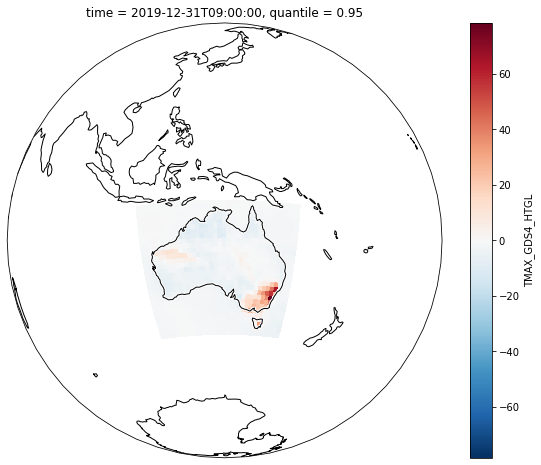

In [9]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.Orthographic(135, -20))
EHF.sel(time='2019-12-31').plot(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines(color='w', linewidth=3); ax.coastlines(color='k', linewidth=1);